<a href="https://colab.research.google.com/github/Aerie55/lecture1/blob/main/PUM4_regresja_todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

zaczytanie niezbędnych bibliotek

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor

zaczytaj dane dotyczace sprzedazy

In [86]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-86-72cc2aa30810>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


preprocessing

1.   sprawdż typy danych
2.   zmien etykiedy na zmienne liczbowe
3. w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością



In [87]:
print("\nTypy danych:\n", df.dtypes)

categorical_columns = df.select_dtypes(include=['object']).columns


Typy danych:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [88]:
col_to_change=[ 'Gender', 'Education Level', 'Job Title']
for col in col_to_change:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
print(df.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


In [89]:
null_counts = df.isnull().sum()

print("\nLiczba wartości null w każdej kolumnie:\n", null_counts)



Liczba wartości null w każdej kolumnie:
 Age                    2
Gender                 0
Education Level        0
Job Title              0
Years of Experience    2
Salary                 2
dtype: int64


In [90]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

Podziel zbiór danych na testowy i treningowy w stosunku 30/70

In [91]:
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Stworz model regresji liniowej korzystajac z parametrów domyślnych
Przykład dokumentacji: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [92]:
regressor = LinearRegression().fit(X_train, y_train)

ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji

In [93]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Explained Variance Score: {evs}")

Mean Squared Error: 251384617.9839208
Mean Absolute Error: 10976.816634914634
Explained Variance Score: 0.8830175673765587


spróbuj poprawić model, zacznij od danych, sprawdz korelacje, znormalizuj

In [94]:
correlation_matrix = df.corr()
print("\nMacierz korelacji:\n", correlation_matrix)


Macierz korelacji:
                           Age    Gender  Education Level  Job Title  \
Age                  1.000000 -0.019865         0.546020   0.116616   
Gender              -0.019865  1.000000         0.008677   0.041562   
Education Level      0.546020  0.008677         1.000000   0.127791   
Job Title            0.116616  0.041562         0.127791   1.000000   
Years of Experience  0.979128  0.002818         0.573355   0.099299   
Salary               0.922335  0.069498         0.650507   0.135033   

                     Years of Experience    Salary  
Age                             0.979128  0.922335  
Gender                          0.002818  0.069498  
Education Level                 0.573355  0.650507  
Job Title                       0.099299  0.135033  
Years of Experience             1.000000  0.930338  
Salary                          0.930338  1.000000  


In [ ]:
for column in df.columns:
  print(f"Kolumna: {column}")
  print(f"Maksimum: {df[column].max()}")
  print(f"Minimum: {df[column].min()}")
  print("-" * 20)

In [ ]:
print(df[(df['Salary'] < 1000)])
print(df[(df['Salary'] > 240000)])

In [97]:
df = df[(df['Salary'] >= 1000) & (df['Salary'] <= 220000)]

Zobrazowanie modelu regrecji liniowej

In [ ]:
y_pred = regressor.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Faktyczne wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Porównanie przewidywanych i faktycznych wartości")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


Zbuduj model regresji odpornej i przetestuj jego predykcje

In [ ]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, residual_threshold=25000, random_state=42)
ransac.fit(X_train, y_train)

huber = HuberRegressor(epsilon=1.35, max_iter=100, alpha=0.0001)
huber.fit(X_train, y_train)


y_pred_ransac = ransac.predict(X_test)
y_pred_huber = huber.predict(X_test)

mse_ransac = mean_squared_error(y_test, y_pred_ransac)
mae_ransac = mean_absolute_error(y_test, y_pred_ransac)
evs_ransac = explained_variance_score(y_test, y_pred_ransac)

mse_huber = mean_squared_error(y_test, y_pred_huber)
mae_huber = mean_absolute_error(y_test, y_pred_huber)
evs_huber = explained_variance_score(y_test, y_pred_huber)

print("RANSAC:")
print(f"Mean Squared Error: {mse_ransac}")
print(f"Mean Absolute Error: {mae_ransac}")
print(f"Explained Variance Score: {evs_ransac}")

print("\nHuberRegressor:")
print(f"Mean Squared Error: {mse_huber}")
print(f"Mean Absolute Error: {mae_huber}")
print(f"Explained Variance Score: {evs_huber}")



Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ransac, label='RANSAC', alpha=0.7)
plt.scatter(y_test, y_pred_huber, label='HuberRegressor', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Faktyczne wartości')
plt.ylabel('Przewidziane wartości')
plt.title('Porównanie przewidywanych i faktycznych wartości dla modeli RANSAC i HuberRegressor')
plt.legend()
plt.show()


Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

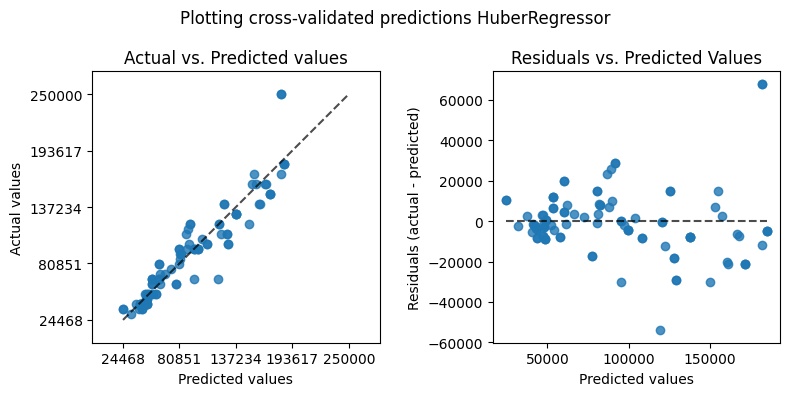

In [110]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay


fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred_huber,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred_huber,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle(f"Plotting cross-validated predictions HuberRegressor")
plt.tight_layout()
plt.show()